## Entregável 3

### Autor: Vítor Viana

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

### Descrição do dataset

As features disponíveis no dataset são:

> * employee_id: número de identificação do funcionário

> * department: departamento de trabalho do funcionário

> * region: região de trabalho

> * education: escolaridade

> * gender: gênero

> * recruitment_channel: meio como o funcionário foi recrutado

> * no_of_trainings: quantidade de treinamentos realizados recentemente

> * age: idade em anos

> * previous_year_rating: avaliação no último ano

> * length_of_service: tempo de serviços prestados

> * awards_won?: se foi premiado (1) ou não (0)

> * avg_training_score: média vigente de avaliação em treinamentos

A variável alvo de estudo (<i>target</i>) é:

> * is_promoted: sugere a promoção ou não do funcionário

In [52]:
df = pd.read_csv("dataset3.psv",sep='|')
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1.0,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1.0,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1.0,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2.0,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1.0,45,3.0,2,0,73.0,0


In [53]:
df.shape

(54808, 13)

### 1. Limpeza do dataset

<div style="text-align: justify"> Inicialmente, checando o percentual de dados ausentes, é possível perceber que a feature <i>'avg_training_score'</i> é a que apresenta um maior número de dados faltantes com cerca de 13,6%. As features <i>education</i>, <i>no_of_training</i> e <i>previous_year_rating</i> também possuem uma parcela considerável de dados ausentes.  Além disso, todas as features mencionadas são potencialmente importantes na determinação da <i>target</i>, ou seja, se o funcionário merece ou não ser promovido e, portanto, a estratégia de eliminar as colunas não é efetiva para a análise.</div>

In [54]:
df.isnull().mean()

 employee_id            0.000000
department              0.000000
region                  0.000000
education               0.043953
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.088418
age                     0.000000
previous_year_rating    0.075244
length_of_service       0.000000
awards_won?             0.000000
avg_training_score      0.136075
is_promoted             0.000000
dtype: float64

<div style="text-align: justify"> Em seguida, pode-se checar incongruências associadas a features categóricas (cujos registros são do tipo string), sendo que registros diferentes podem significar a mesma coisa (erro de digitação, sinônimos, entre outros). Nesse sentido, checando o tipo de dados, as features cujo <i>output</i> são o esperado (tipo <i>'object'</i>) são: <i>department</i>, <i>region</i>, <i>education</i>, <i>gender</i> e <i>recruitment_channel</i>. A princípio a feature <i> recruitment_channel </i> não traz tanta relevância para a análise, de modo que será desconsiderada. </div>

In [55]:
df.dtypes

 employee_id              int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings         float64
age                       int64
previous_year_rating    float64
length_of_service         int64
awards_won?               int64
avg_training_score      float64
is_promoted               int64
dtype: object

### 1.1. Tratamento de features categóricas

### 1.1.a. Feature department

<div style="text-align: justify"> Para a feature em questão, percebe-se que o registro inesperado corresponde a apenas 25 dentre  as 54808 entradas. Logo, optou-se por remover as linhas, dado que elas não apresentam muito significado para o dataset. </div>  

In [56]:
df['department'].value_counts()

Sales & Marketing     16840
Operations            11348
Technology             7138
Procurement            7138
Analytics              5352
Finance                2536
HR                     2418
Legal                  1014
R&D                     999
quem trouxe quenga       25
Name: department, dtype: int64

In [57]:
indexToDrop = df[df['department'] == 'quem trouxe quenga'].index
df.drop(indexToDrop, inplace=True)

### 1.1.b. Feature region

<div style="text-align: justify"> De modo semelhante ao da feature anterior, os dados inesperados para região foram descartados. </div>

In [58]:
df['region'].value_counts()

region_2                12334
region_22                6423
region_7                 4838
region_15                2808
region_13                2648
region_26                2260
region_31                1933
region_4                 1703
region_27                1657
region_16                1465
region_28                1318
region_11                1315
region_23                1175
region_29                 994
region_32                 945
region_19                 874
region_20                 850
region_14                 827
region_25                 819
region_17                 796
region_5                  766
region_6                  690
region_30                 657
region_8                  654
region_10                 648
region_1                  610
region_24                 508
region_12                 499
region_9                  420
region_21                 411
region_3                  346
region_34                 288
region_33                 269
region_18 

In [59]:
indexToDrop = df[df['region'] == 'casa da lu na suecia'].index
df.drop(indexToDrop, inplace=True)

### 1.1.c. Feature education

<div style="text-align: justify"> Conforme identificado anteriormente, a feature <i>education</i> apresenta uma parcela considerável de dados faltantes (aproximadamente 4,4%), o que pode ser visto pelo comando <code>unique()</code>, que destaca que há valores registrados como <i>nan</i>. Assim, optou-se por substituir os valores nulos pela moda, isto é, o valor que mais aparece para essa feature, que no caso é <b>Bachelor's</b>. </div>

In [60]:
df['education'].unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [61]:
df['education'].value_counts()

Bachelor's          36644
Master's & above    14921
Below Secondary       805
Name: education, dtype: int64

In [62]:
df['education'].fillna("Bachelor's", inplace = True)

### 1.1.d. Feature gender

<div style="text-align: justify"> Nesse caso, identifca-se que alguns dos registros são equivalentes, porém estão escritos de forma diferente. Dessa maneira, as entradas semelhantes foram uniformizadas. Além disso, há um registro que foi desconsiderado devido ao baixo percentual em relação ao total, sendo que não afetará a análise final. </div>

In [63]:
df['gender'].value_counts()

m                                   34989
f                                   15736
MALE                                 3257
fEMALE                                573
eu sou homem hetero homossexual!      224
Name: gender, dtype: int64

In [64]:
# padronizando os registros
df['gender'].replace('MALE', 'm', inplace=True)
df['gender'].replace('fEMALE', 'f', inplace=True)

# removendo as entradas desconsideradas
indexToDrop = df[df['gender'] == 'eu sou homem hetero homossexual!'].index
df.drop(indexToDrop, inplace=True)

### 1.2. Tratamento de dados numéricos

<div style="text-align: justify"> Para visualizar a distribuição dos dados numéricos e poder realizar inferências pertinentes, utilizou-se o comando <code>describe()</code>. </div>

In [65]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,54555.000000,49711.000000,54555.000000,50441.000000,54555.000000,54555.000000,47100.000000,54555.000000
mean,39197.437485,1.257187,274.620365,3.330485,5.861479,0.022711,63.498047,0.085272
std,22588.234066,0.613679,5435.098934,1.260647,4.261050,0.148982,13.487378,0.279288
min,1.000000,1.000000,-32.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19673.500000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39223.000000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58731.000000,1.000000,39.000000,4.000000,7.000000,0.000000,77.000000,0.000000
max,78298.000000,10.000000,123456.000000,5.000000,37.000000,1.000000,99.000000,1.000000


<div style="text-align: justify"> Com a saída do código acima, a priori é possível identificar apenas a feature <i>age</i> como problemática em termos de dados, uma vez que o valor mínimo obtido foi de -32, o valor máximo de 123456 e o valor médio foi de 274.6 anos, de forma que os dados estão incoerentes com a faixa etária esperada. Vale ressaltar que <i>employee_id</i> é apenas um número que identifica cada funcionário, não sendo útil para a análise desejada e não tendo nenhum valor a descrição estatística realizada para essa feature específica. Por fim, na coluna da variável alvo (<i>is_promoted</i>) é notável que a grande maioria dos resultados foram negativos quanto à promoção do funcionário (resultados nulos), dado que o quantil(0.75) vale 0 (não aprovado) e a média indica que o índice de promoção é de cerca de 8,5%. Esse fato indica de antemão que o dataset envolve dados desbalanceados. </div>

### 1.2.a. Feature age

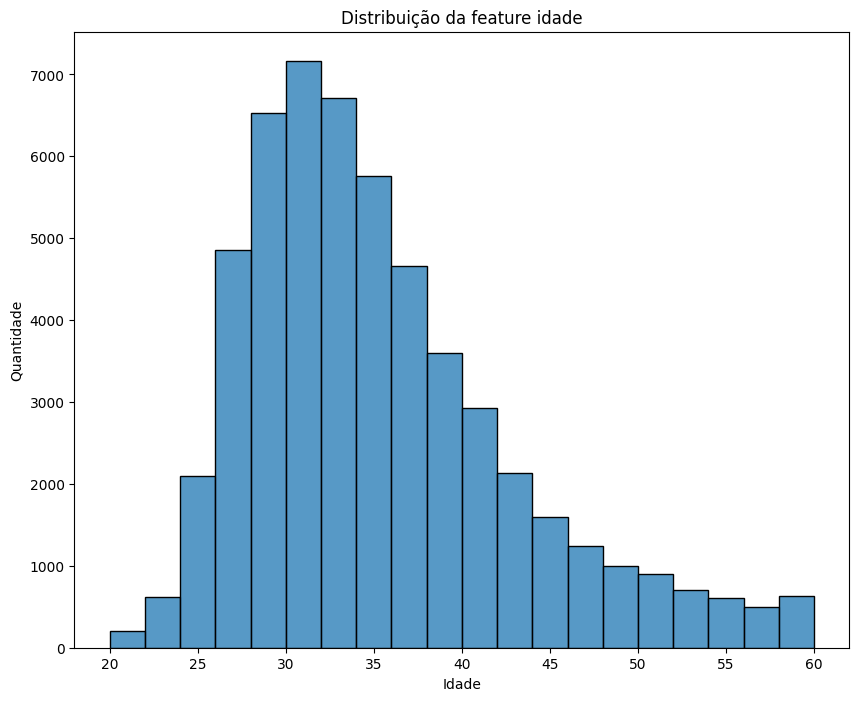

In [66]:
df = df.query('0<age<120')

# gráfico de distribuição para o dataset modificado
plt.figure(figsize=(10,8))
sns.histplot(x=df['age'], bins = 20)
plt.xlabel("Idade")
plt.ylabel("Quantidade")
plt.title('Distribuição da feature idade')
plt.show()

<div style="text-align: justify"> Do gráfico acima, segue que a distribuição de idades no dataset modificado é coerente com o esperado. Além disso, sendo o tempo máximo de serviço igual a 37 e a idade máxima igual a 60, a princípio não é possível afirmar com certeza se a feature <i>length_of_service</i> apresenta dados duvidosos. Assim, caso ainda existam algumas inconsistências, elas serão identificadas na próxima etapa de análise das features.

### 1.2.b. Features no_of_trainings e previous_year_rating

<div style="text-align: justify"> As features mencionadas foram identificadas anteriormente por conter dados ausentes. Nesse sentido, por se tratar de quantidade e de avaliação, ambos os casos trabalham com números inteiros e em um pequeno intervalo. Dessa maneira, a estratégia de imputação adotada para manter esse tipo de dado foi univariada (imputação por moda). </div>

In [67]:
from sklearn.impute import SimpleImputer
# Imputação com o valor mais frequente

mode_imputer = SimpleImputer(strategy='most_frequent')
df['no_of_trainings'] = mode_imputer.fit_transform(df['no_of_trainings'].values.reshape(-1,1))
df['previous_year_rating'] = mode_imputer.fit_transform(df['previous_year_rating'].values.reshape(-1,1))

### 1.2.c. Feature avg_training_score

<div style="text-align: justify"> Nesse caso, o intervalo que engloba todos os dados é maior do que para as demais features, além de que a porcentagem de dados ausentes também é maior. Por isso, optou-se por utilizar um método de imputação avançado e em seguida arredondar o resultado obtido para que o valor seja inteiro.  </div>

In [68]:
# Imputação multivariada MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model

df_mice = df.filter(['no_of_trainings','age','previous_year_rating',
                     'length_of_service','awards_won?', 'avg_training_score'], axis=1).copy()

mice_imputer = IterativeImputer(estimator=linear_model.BayesianRidge(), missing_values = np.nan)

df_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(df_mice), columns=df_mice.columns)
df.reset_index(drop = True, inplace = True)
df['avg_training_score'] = round(df_mice_imputed['avg_training_score'])
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1.0,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1.0,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1.0,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2.0,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1.0,45,3.0,2,0,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54441,3030,Technology,region_14,Bachelor's,m,sourcing,1.0,48,3.0,17,0,61.0,0
54442,74592,Operations,region_27,Master's & above,f,other,1.0,37,2.0,6,0,56.0,0
54443,13918,Analytics,region_1,Bachelor's,m,other,1.0,27,5.0,3,0,79.0,0
54444,13614,Sales & Marketing,region_9,Bachelor's,m,sourcing,1.0,29,1.0,2,0,45.0,0


### 2. Análise do dataset

<div style="text-align: justify"> Da etapa anterior, segue que as colunas <i>employee_id</i> e <i>recruitment_channel</i> serão eliminadas do dataset. Nessa etapa serão inicialmente analisadas individualmente algumas features e em seguida, busca-se estabelecer relações entre as features. </div>

In [69]:
columns = list(df.columns)
columns

[' employee_id',
 'department',
 'region',
 'education',
 'gender',
 'recruitment_channel',
 'no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'awards_won?',
 'avg_training_score',
 'is_promoted']

In [70]:
promote = df.drop([' employee_id','recruitment_channel'], axis=1)
promote

,department,region,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,1.0,35,5.0,8,0,49.0,0
1,Operations,region_22,Bachelor's,m,1.0,30,5.0,4,0,60.0,0
2,Sales & Marketing,region_19,Bachelor's,m,1.0,34,3.0,7,0,50.0,0
3,Sales & Marketing,region_23,Bachelor's,m,2.0,39,1.0,10,0,50.0,0
4,Technology,region_26,Bachelor's,m,1.0,45,3.0,2,0,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...
54441,Technology,region_14,Bachelor's,m,1.0,48,3.0,17,0,61.0,0
54442,Operations,region_27,Master's & above,f,1.0,37,2.0,6,0,56.0,0
54443,Analytics,region_1,Bachelor's,m,1.0,27,5.0,3,0,79.0,0
54444,Sales & Marketing,region_9,Bachelor's,m,1.0,29,1.0,2,0,45.0,0


### 2.1. Análise individual de distribuições

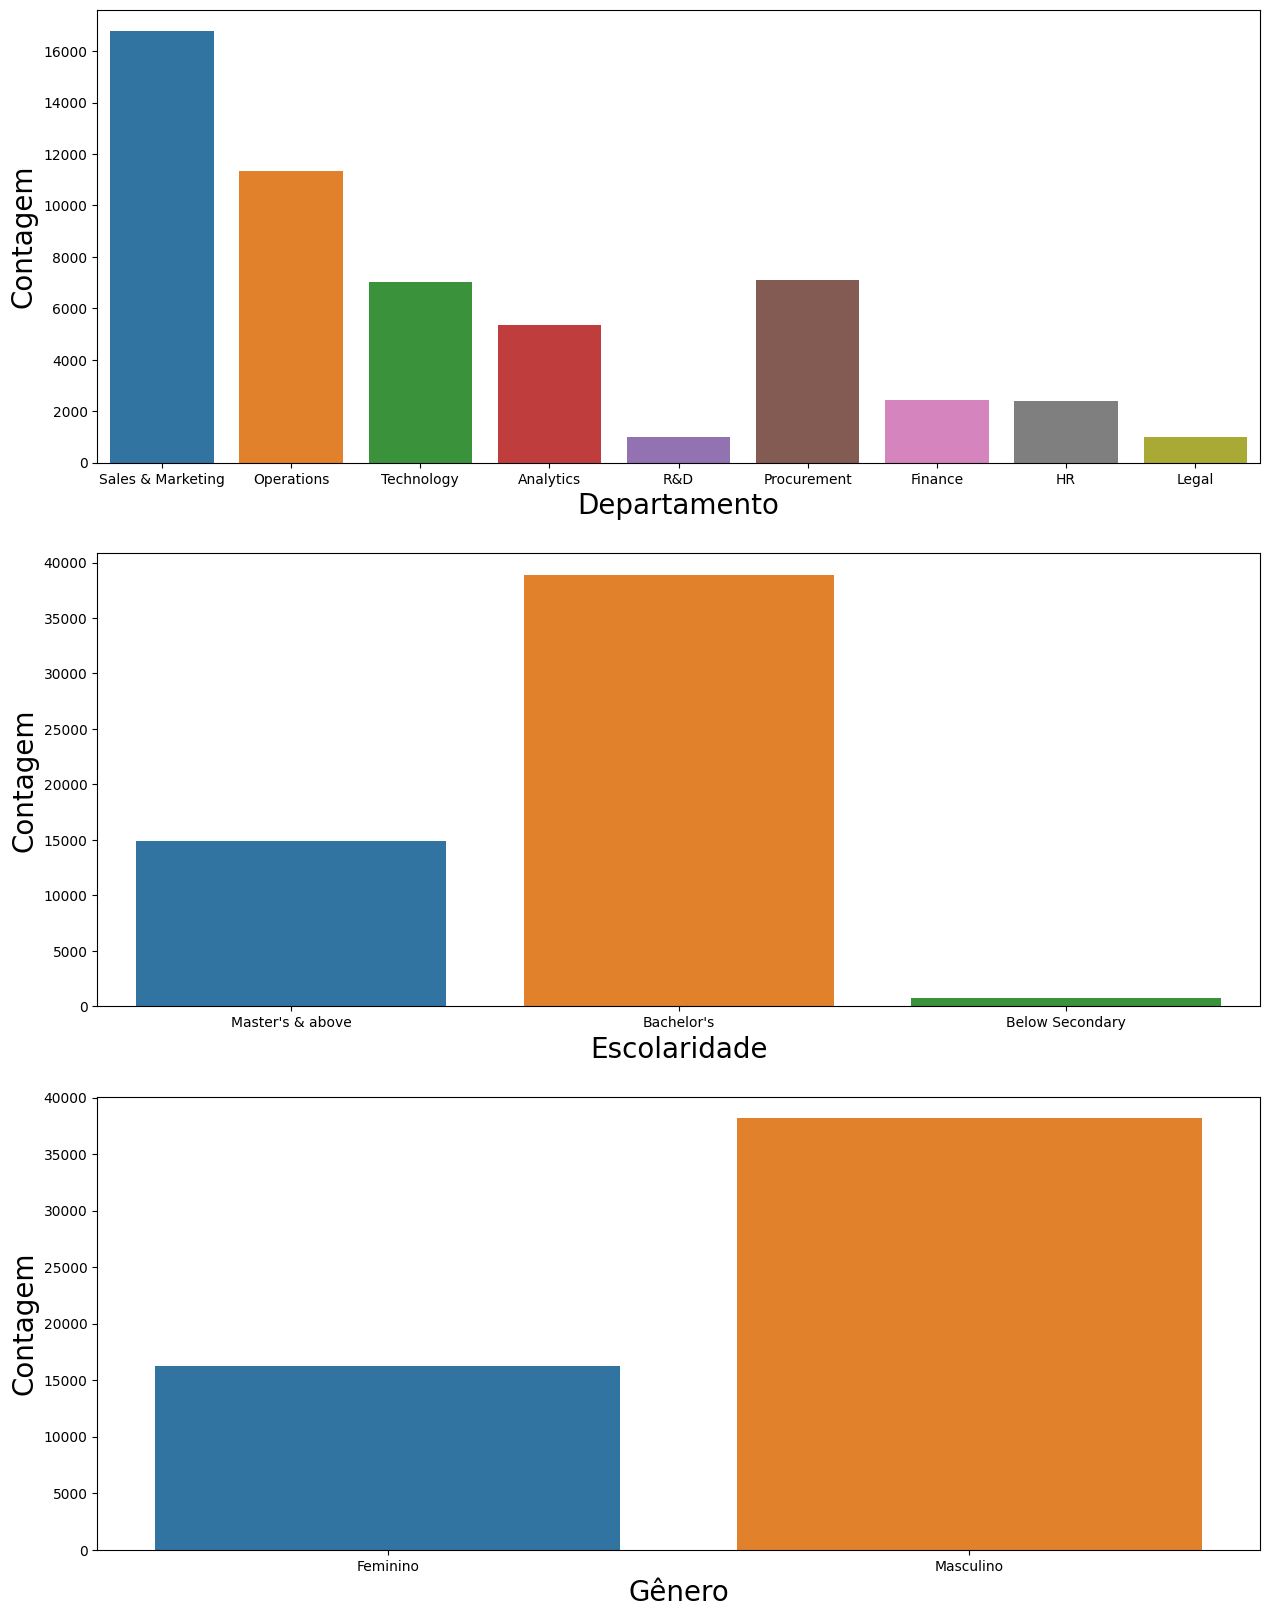

In [71]:
fig, axs = plt.subplots(3, 1, figsize=(15, 20))

dicio = {'m': 'Masculino', 'f': 'Feminino'}

# Countplot 1
sns.countplot(x=promote['department'], ax=axs[0]) # Realiza o countplot
axs[0].set_xlabel('Departamento', fontsize = 20)
axs[0].set_ylabel('Contagem', fontsize = 20)

# Countplot 2
sns.countplot(x=promote['education'], ax=axs[1]) # Realiza o countplot
axs[1].set_xlabel('Escolaridade', fontsize = 20)
axs[1].set_ylabel('Contagem', fontsize = 20)

# Countplot 3
sns.countplot(x=promote['gender'].replace(dicio), ax=axs[2]) # Realiza o countplot
axs[2].set_xlabel('Gênero', fontsize = 20)
axs[2].set_ylabel('Contagem', fontsize = 20)

plt.show()

<div style="text-align: justify">

Da análise dos gráficos para essas features categóricas segue que:
<ul>
<li> A maior quantidade dos funcionários está concentrada nos departamentos 'vendas e marketing' e 'operações'; </li>
<li> Em termos de escolaridade, a maioria dos funcionários tem bacharelado, uma quantidade intermediária tem mestrado/doutorado e uma minoria tem educação formal abaixo do segundo grau; </li>
<li> A quantidade referente a 'masculino' é maioritária em relação a 'feminino' na contagem dos funcionários estudados.</li>
</ul>

</div>

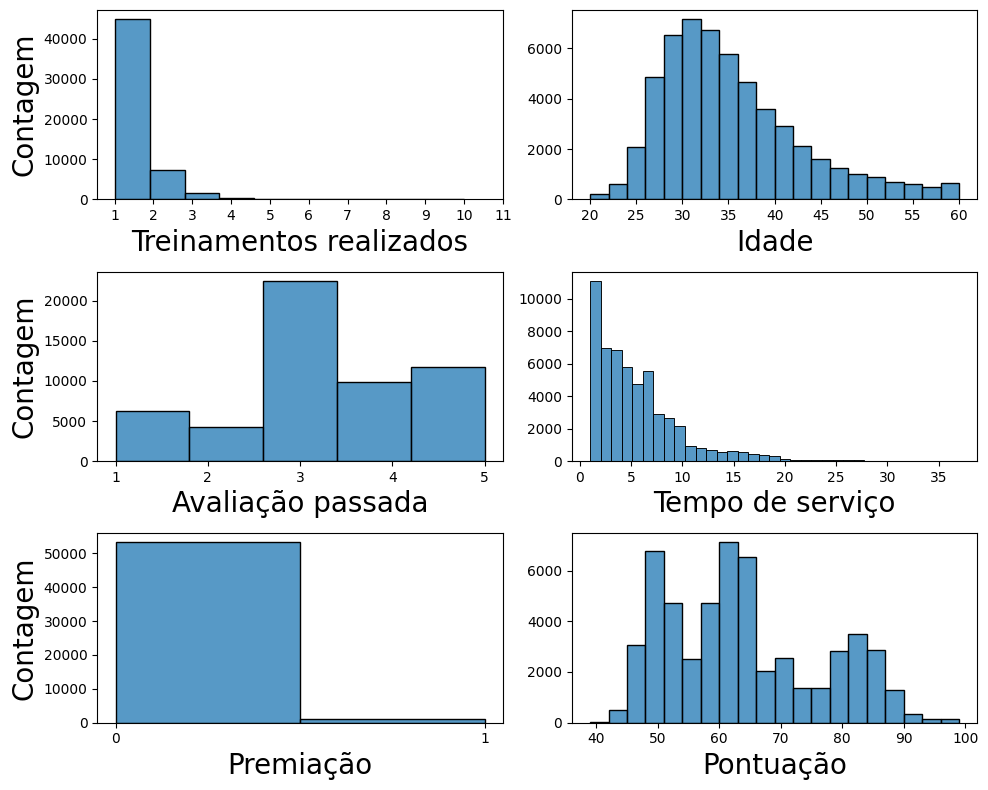

In [72]:
fig, axs = plt.subplots(3, 2, figsize=(10, 8))

# Histplot 1
xticks_array = [i+1 for i in range(11)]
sns.histplot(x=promote['no_of_trainings'], ax=axs[0, 0], bins = 10) # Realiza o histplot
axs[0, 0].set_xlabel('Treinamentos realizados', fontsize = 20)
axs[0, 0].set_xticks(xticks_array)
axs[0, 0].set_ylabel('Contagem', fontsize = 20)

# Histplot 2
sns.histplot(x=promote['age'], ax=axs[0, 1], bins = 20) # Realiza o histplot
axs[0, 1].set_xlabel('Idade', fontsize = 20)
axs[0, 1].set_ylabel('')

# Histplot 3
xticks_array = [i+1 for i in range(5)]
sns.histplot(x=promote['previous_year_rating'], ax=axs[1, 0], bins = 5) # Realiza o histplot
axs[1, 0].set_xlabel('Avaliação passada', fontsize = 20)
axs[1, 0].set_xticks(xticks_array)
axs[1, 0].set_ylabel('Contagem', fontsize = 20)

# Histplot 4
sns.histplot(x=promote['length_of_service'], ax=axs[1, 1], bins = 35) # Realiza o histplot
axs[1, 1].set_xlabel('Tempo de serviço', fontsize = 20)
axs[1, 1].set_ylabel('')

# Histplot 5
sns.histplot(x=promote['awards_won?'], ax=axs[2, 0], bins = 2) # Realiza o histplot
axs[2, 0].set_xlabel('Premiação', fontsize = 20)
axs[2, 0].set_xticks([0,1])
axs[2, 0].set_ylabel('Contagem', fontsize = 20)

# Histplot 6
sns.histplot(x=promote['avg_training_score'], ax=axs[2, 1], bins = 20) # Realiza o histplot
axs[2, 1].set_xlabel('Pontuação', fontsize = 20)
axs[2, 1].set_ylabel('')

plt.tight_layout()
plt.show()

<div style="text-align: justify">

Da análise dos gráficos as features numéricas segue que:
<ul>
<li> Todos os funcionários realizaram pelo menos um treinamento e a concentração maior do número de funcionários está entre as categorias de 1 e 3 treinamentos realizados; </li>
<li> Em termos de idade, a grande maioria dos funcionários está concentrada entre 27 e 40 anos. Além disso, é a distribuição obtida menos afastada da curva de distibuição normal, pois apresenta duas caudas e uma grande concentração no meio (distribuição menos assimétrica); </li>
<li> Considerando a contagem de funcionários por valor de avaliação recebida, percebe-se que a maioria dos funcionários recebeu nota 3 ou mais, indicando que as avaliações foram no geral positivas;</li>
<li> A curva de tempo de serviço é bastante assimétrica, o que era de se esperar, dado que em uma empresa existe um ciclo característico de contratação e demissão de funcionários, de modo que uma quantidade mínima trabalha diversos anos no mesmo emprego;</li>
<li> Em premiação, a esmagadora maioria não recebeu nenhuma premiação no ano anterior;</li>
<li> Por fim, para a pontuação, a maioria dos funcionários está concentrada na faixa entre 45 e 65 pontos;</li>
</ul>

Vale ressaltar que como essas variáveis numéricas possuem valores de ordem distintas (por exemplo o valor de pontuação está em uma escala maior do que o de premiação) será necessário realizar um ajuste de escala posteriormente para o modelo considerar todas essas features de forma adequada.
</div>

### 2.2. Análise conjunta de features

### 2.2.1. Correlação entre os parâmetros numéricos e a target

<Axes: >

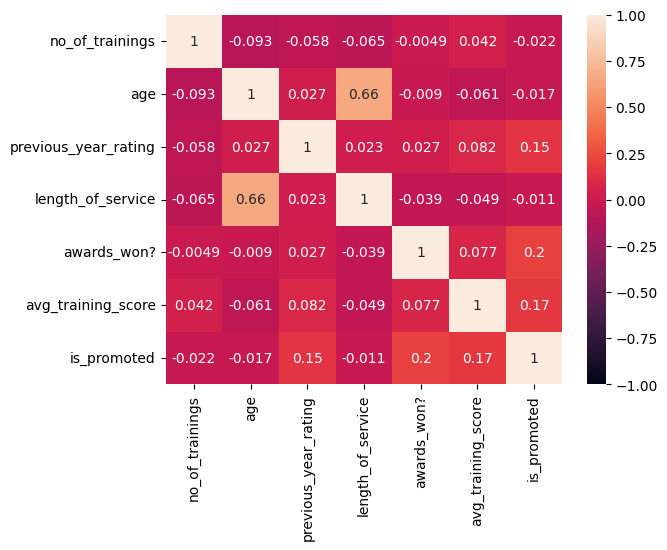

In [73]:
numericals = promote[['no_of_trainings','age','previous_year_rating',
                     'length_of_service','awards_won?', 'avg_training_score', 'is_promoted']]

sns.heatmap(numericals.corr(), annot=True, vmin=-1, vmax=1)
# - Os argumentos vmin e vmax indicam que os valores
#    mínimo e máximo da correlação são -1 e 1
# - O parâmetro annot faz com que a correlação seja escrita
#   dentro dos retângulos

<div style="text-align: justify"> Como era de se esperar as features idade e tempo de serviço apresentam uma correlação alta (era esperado pelo fato de pessoas com mais anos de serviço apresentarem naturalmente um maior tempo de vida). Dessa forma, como as duas features estão intrinsecamente relacionadas, apenas uma delas deve ser considerada no modelo. Optou-se por descartar a feature tempo de serviço, uma vez que a idade pode carregar essa informação assim como adicionar novas informações. Por exemplo, membros com pouco tempo de serviço para a empresa mas com bastante experiência podem agregar no contexto do trabalho a ponto de serem promovidos. Um fato interessante de destacar é que o número de treinamentos apresenta correlação negativa com as demais features exceto a pontuação média de treino (à medida que mais treinamentos são realizados a pontuação do funcionário tende a aumentar). </div>

In [74]:
promote.drop(['length_of_service'], axis=1, inplace = True)

<div style="text-align: justify"> Por fim, a variável alvo da análise está mais correlacionada com as features <i>'previous_year_rating'</i>, <i>'awards_won?'</i> e <i>'avg_training_score'</i>.

### 2.2.2. Relação entre features categóricas

<div style="text-align: justify"> Das análises possíveis envolvendo as features categóricas, a fim de não passar batido, optou-se por realizar apenas a relação entre três das features para também não sobrecarregar o notebook. Foi escolhida para estudo a possível relação entre gênero e educação com departamento de trabalho. </div>

In [75]:
## Criação de um gráfico de barras

fig = go.Figure() # definição da figura

# definição das propriedades do histograma
fig = (
    px.histogram(
        promote,
        y = 'department', # definição do eixo com as categorias, no caso departamentos
        color = 'education', # adiciona uma dimensão do gráfico associada a cores diferentes
        pattern_shape = 'gender', # adiciona uma dimensão do gráfico associada a padrões de preenchimento diferentes
        barmode = 'relative', # as barras são acumuladas em cima das outras sem se sobrepor
        text_auto = True, # display dos valores
        # altera o título do eixo utilizado com variável categórica
        labels = {'department': 'Departamento de trabalho'},
    )
    .update_traces(hoverinfo = 'all')
    .update_layout(
        # atualiza o título e sua posição
        title={
            'text': 'Relação entre nivel de educação formal e gênero do funcionário com departamento em que trabalha',
            'x': 0.5,
        },
        xaxis_title = 'Contagem', # titulo do eixo númerico
    )
    .update_yaxes(categoryorder = 'category ascending') # ordena por ordem alfabética
)

fig.show()

<div style="text-align: justify"> Da figura obtida, segue que algumas áreas empregam um público mais intruído, a exemplo de pesquisa e desenvolvimento (<i>R&D</i>) que é quase metade constituída por funcionários com mestrado/doutorado, enquanto que outras áreas empregam uma imensa maioria de funcionários com graduação completa e também funcionários com nível de educação abaixo do segundo grau. É possível ver também que os departamentos que empregam mais funcionárias são as áreas de compras (<i>procurement</i>) e de operações. </div>

### 2.2.3. Relação entre as features categóricas e a target

<div style="text-align: justify"> Finalizando a análise do conjunto de dados, tem-se que 10% dos funcionários com mestrado/doutorado, 8% com bacharelado e 8,5% com escolaridade abaixo do segundo grau foram promovidos. Nesse sentido, o nível de escolaridade não apresentou uma relação muito forte com a determinação da promoção. De maneira semelhante para o countplot referente ao gênero, a taxa de promoção para funcionárias é de 9% e para funcionários de 8,3%. </div>

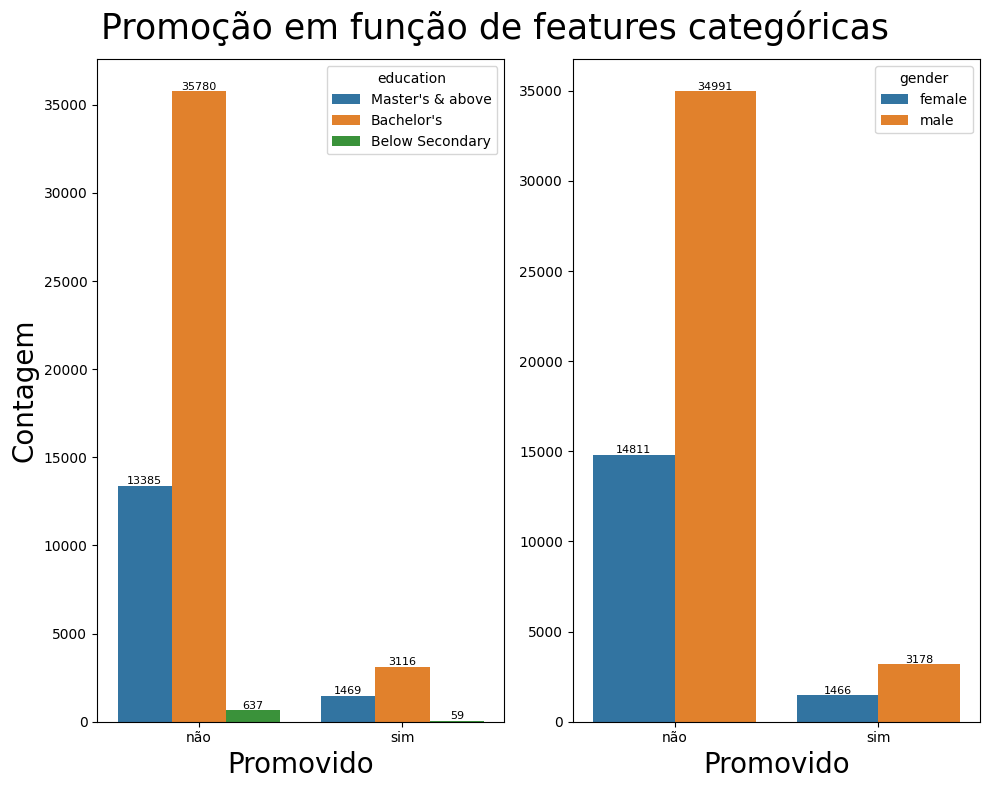

In [76]:
fig, axs = plt.subplots(1, 2, figsize=(10, 8))
plt.suptitle('Promoção em função de features categóricas', fontsize = 25)
dicio = {'is_promoted': {0.0: 'não', 1.0: 'sim'},
         'gender': {'m': 'male', 'f': 'female'}}
promote_categorical = promote.replace(dicio)

# Countplot 1
plot = sns.countplot(x = 'is_promoted', hue = 'education', data = promote_categorical, ax = axs[0])
axs[0].set_xlabel('Promovido', fontsize = 20)
axs[0].set_ylabel('Contagem', fontsize = 20)
for i in plot.patches:
    plot.annotate(int(i.get_height()),
                  (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center',
                  va='baseline',
                  fontsize=8,
                  color='black',
                  xytext=(0, 1),
                  textcoords='offset points')

# Countplot 2
plot = sns.countplot(x = 'is_promoted', hue = 'gender', data = promote_categorical, ax = axs[1])
axs[1].set_xlabel('Promovido', fontsize = 20)
axs[1].set_ylabel('', fontsize = 20)
for i in plot.patches:
    plot.annotate(int(i.get_height()),
                  (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center',
                  va='baseline',
                  fontsize=8,
                  color='black',
                  xytext=(0, 1),
                  textcoords='offset points')

plt.tight_layout()
plt.show()

### 3. Preprocessamento de dados categóricos

<div style="text-align: justify"> Para que o modelo leve em consideração as features categóricas e, ainda, sabendo que em nenhuma das colunas que envolvem dados não numéricos nesse dataset tem uma ordenação, a estratégia adotada para codificação dessas features foi One-Hot Encoding. </div>

In [77]:
categories = ['department', 'region', 'education', 'gender']
categoricals = promote[categories]
categoricals

,department,region,education,gender
0,Sales & Marketing,region_7,Master's & above,f
1,Operations,region_22,Bachelor's,m
2,Sales & Marketing,region_19,Bachelor's,m
3,Sales & Marketing,region_23,Bachelor's,m
4,Technology,region_26,Bachelor's,m
...,...,...,...,...
54441,Technology,region_14,Bachelor's,m
54442,Operations,region_27,Master's & above,f
54443,Analytics,region_1,Bachelor's,m
54444,Sales & Marketing,region_9,Bachelor's,m


In [78]:
promote_encoded = pd.get_dummies(promote, columns = categories)
promote_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54446 entries, 0 to 54445
Data columns (total 54 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   no_of_trainings               54446 non-null  float64
 1   age                           54446 non-null  int64  
 2   previous_year_rating          54446 non-null  float64
 3   awards_won?                   54446 non-null  int64  
 4   avg_training_score            54446 non-null  float64
 5   is_promoted                   54446 non-null  int64  
 6   department_Analytics          54446 non-null  uint8  
 7   department_Finance            54446 non-null  uint8  
 8   department_HR                 54446 non-null  uint8  
 9   department_Legal              54446 non-null  uint8  
 10  department_Operations         54446 non-null  uint8  
 11  department_Procurement        54446 non-null  uint8  
 12  department_R&D                54446 non-null  uint8  
 13  d

### 4. Preprocessamento de dados numéricos

<div style="text-align: justify"> Conforme já mencionado, é necessário atribuir uma escala para as features numéricas para que os valores de ordem maior não interfiram no desempenho do modelo. Nessa lógica, foi realizada a normalização das features numéricas atribuindo uma escala de 0 a 1. </div>

In [79]:
from sklearn.preprocessing import MinMaxScaler

numerical = ['no_of_trainings','age','previous_year_rating','awards_won?','avg_training_score']
scaler = MinMaxScaler()
promote_preproc = promote_encoded.copy()
promote_preproc[numerical] = scaler.fit_transform(promote_encoded[numerical])

promote_preproc

,no_of_trainings,age,previous_year_rating,awards_won?,avg_training_score,is_promoted,department_Analytics,department_Finance,department_HR,department_Legal,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m
0,0.000000,0.375,1.00,0.0,0.166667,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
1,0.000000,0.250,1.00,0.0,0.350000,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0.000000,0.350,0.50,0.0,0.183333,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0.111111,0.475,0.00,0.0,0.183333,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0.000000,0.625,0.50,0.0,0.566667,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54441,0.000000,0.700,0.50,0.0,0.366667,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
54442,0.000000,0.425,0.25,0.0,0.283333,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
54443,0.000000,0.175,1.00,0.0,0.666667,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
54444,0.000000,0.225,0.00,0.0,0.100000,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1


### 5. Construção do Modelo

<div style="text-align: justify"> Para treinar e validar o modelo foram importados os módulos da biblioteca scikit-learn do python como segue:  </div>

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### 5.1. Divisão dos dados em treino e teste

<div style="text-align: justify"> A divisão dos dados foi realizada numa proporção de 0.8 para os dados de treino e 0.2 para os dados de teste. </div>

In [81]:
X = promote_preproc.drop('is_promoted', axis=1) # cópia sem a coluna is_promoted (target)
y = promote_preproc['is_promoted']

# 20% dos dados vão ser utilizados para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.2)

print(X_train.shape)
print(X_test.shape)

(43556, 53)
(10890, 53)


### 5.2. Determinação do número de vizinhos K

<div style="text-align: justify"> Ainda no contexto da construção do modelo, é necessário determinar o valor do parâmetro que é traduzido no número de vizinhos considerado para realizar uma determinada predição. Assim, por exemplo para um valor de K arbitrário, o modelo teve sua acurácia testada. </div>

In [82]:
K_value = 20
model = KNeighborsClassifier(n_neighbors = K_value)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print(accuracy_score(y_test, y_predict))

0.9180899908172635


<div style="text-align: justify"> Para determinar o menor número de vizinhos que leva a uma maior acurácia, obteve-se os valores de <code>accuracy_score</code> para valores de 1 a 100, plotando em seguida um gráfico que é traduzido em um pico inicial, seguido por uma estabilização do valor da acurácia com o aumento de K. </div>

In [83]:
# identificação do valor ótimo para o parâmetro K
k_range = range(1, 100)
scores = {}
scores_list = []
for k in k_range:
  model = KNeighborsClassifier(n_neighbors = k)
  model.fit(X_train, y_train)
  y_predict = model.predict(X_test)
  scores[k] = accuracy_score(y_test, y_predict)
  scores_list.append(accuracy_score(y_test, y_predict))

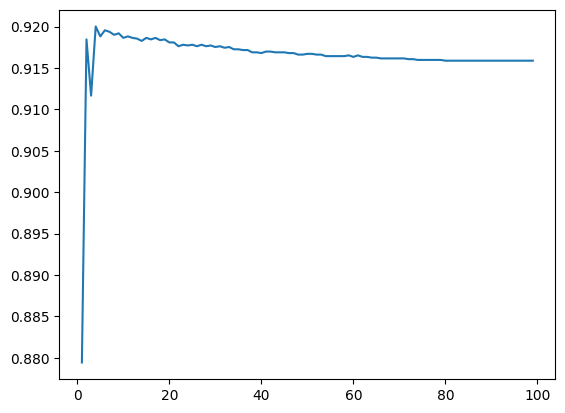

In [84]:
plt.figure
plt.plot(k_range, scores_list)

In [85]:
print("O valor máximo de acurácia obtido foi de {} para K = {}.".format(round(np.max(scores_list), 2), np.argmax(scores_list)))

O valor máximo de acurácia obtido foi de 0.92 para K = 3.


Portanto, o menor número de vizinhos é 3.

### 6. Validação do modelo: avaliação geral do desempenho

<div style="text-align: justify"> Percebe-se que o modelo tem uma acurácia muito boa porque vários dos valores preditos (cerca de 97%) são zero. Nesse sentido, a taxa de acertos é alta pois conforme visto anteriormente a porcentagem de não promovidos no dataset é muito alta. Assim, é possível que o modelo esteja muito rígido para identificar funcionários que merecem ser promovidos (há uma grande tendência em não indicar o indivíduo para promoção), devido à falta de informações nos dados de treino relativas à indivíduos promovidos. Isso é a essência do problema quando se trabalha com dados desbalanceados, sendo que a acurácia é alta mas o desempenho não é necessariamente bom, pois como será visto na seção 7, o número de <i>false negatives</i> é muito alto comparado ao valor de <i>true positives</i>. </div>

In [86]:
K_value = 3
model = KNeighborsClassifier(n_neighbors = K_value)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [87]:
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [88]:
def count_zeros(array_zeros):
  count = 0
  for value in array_zeros:
    if value == 0:
      count += 1
  return count

print(count_zeros(y_predict)/len(y_predict))

0.969605142332415


### 7. Validação do modelo: Precisão e Recall

<div style="text-align: justify"> O valor de <i>precision</i> é calculado como $precision = \frac{t_p}{t_p+f_p}$, em que $t_p$ é o número total de <i>true positives</i> e $f_p$ é o número de <i>false positives</i>. Desse modo, é um parâmetro que mede quantos dos casos em que o resultado da predição foi positivo essa predição foi correta. Já para o cálculo de <i>recall</i> fazemos $recall = \frac{t_p}{t_p+f_n}$, em que $f_n$ é o número de <i>false negatives</i>, sendo então uma proporção dos dados cujo resultado da target é positivo e que foram preditos corretamente.</div>

In [89]:
confusion_matrix1 = confusion_matrix(y_test, y_predict)
print('Matriz de confusão:')
print(confusion_matrix1)

print()
print('Métricas de avaliação:')
print(classification_report(y_test, y_predict))

Matriz de confusão:
[[9785  188]
 [ 774  143]]

Métricas de avaliação:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      9973
           1       0.43      0.16      0.23       917

    accuracy                           0.91     10890
   macro avg       0.68      0.57      0.59     10890
weighted avg       0.89      0.91      0.89     10890



<div style="text-align: justify"> Do output da célula anterior (considerando que os true positivos ocorrem quando a variável target vale 1), segue que os valores obtidos são muito baixos, sobretudo o de recall (0.16), que indica o fato de que o número de falsos negativos é muito superior ao número de verdadeiros negativos. Isso se dá pelo fato de o modelo ter sido treinado com dados desbalanceados e não conseguir identificar com facilidade a classe minoritária (funcionários a serem promovidos). O valor de precisão indica que dada uma predição do modelo para o funcionário ser promovido, há uma chance de 43% de o dado correspondente ter o mesmo resultado para a feature target. </div>

### 8. Dados desbalanceados

<div style="text-align: justify"> Para tratar do problema de classes desbalanceadas, utilizou-se um algoritmo de sobreamostragem sintética para a classe minoritária (SMOTE). A sobreamostra é realizada apenas na parte da amostra destinada para os dados de treino, não afetando as informações presentes na parte do teste. Da amostra inicial, 20% dos dados foram destinados para o teste do modelo. Ao fim, pode-se perceber que os dados para o treino estão balanceados. </div>

In [90]:
from imblearn.over_sampling import SMOTE

# usou-se a divisão entre dados de treino e teste feita anteriormente

# para trabalhar com a sobreamostra
os = SMOTE(random_state=0)

# a sobreamostra é realizada apenas para o dado de treino do modelo
# de modo que não afeta as informações no dado de teste
colunas = X_train.columns # variáveis de treino para o modelo
os_data_X,os_data_y=os.fit_resample(X_train, y_train) # cria dados sintéticos baseados em dados coletados
os_data_X = pd.DataFrame(data=os_data_X,columns=colunas ) # variável de treino após aplicação do algoritmo
os_data_y= pd.DataFrame(data=os_data_y,columns=['is_promoted']) # variável alvo após aplicação do algoritmo

# Checando se os dados estão balanceados
print("Taxa de não promovidos",len(os_data_y[os_data_y['is_promoted']==0])/len(os_data_X))
print("Taxa de promoção",len(os_data_y[os_data_y['is_promoted']==1])/len(os_data_X))

Taxa de não promovidos 0.5
Taxa de promoção 0.5


In [91]:
X=os_data_X[colunas]
y=os_data_y['is_promoted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

K_value = 3
model = KNeighborsClassifier(n_neighbors = K_value)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [92]:
confusion_matrix2 = confusion_matrix(y_test, y_predict)
print('Matriz de confusão:')
print(confusion_matrix2)

print()
print('Métricas de avaliação:')
print(classification_report(y_test, y_predict))

Matriz de confusão:
[[6637 1220]
 [ 723 7352]]

Métricas de avaliação:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      7857
           1       0.86      0.91      0.88      8075

    accuracy                           0.88     15932
   macro avg       0.88      0.88      0.88     15932
weighted avg       0.88      0.88      0.88     15932



<div style="text-align: justify"> É possível notar que os valores de precisão (0.86) e recall (0.91) são bem superiores para esse modelo, de modo que as predições realizadas por este são mais confiáveis. </div>